In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [4]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize']=20,10
rcParams['font.size']=30
sns.set()
np.random.seed(8)


In [9]:
def plot_distribution(inp):
    plt.figure()
    ax=sns.distplot(inp)
    plt.axvline(np.mean(inp),color="k",linestyle="dashed",linewidth=5)
    _,max_=plt.ylim()
    plt.text(
    inp.mean()+inp.mean()/10,
        max_-max_/10,
    "Mean:{:.2f}".format(inp.mean()),
    )
    return plt.figure

In [12]:
ger_sales=np.load("germany_sales.npy")

In [13]:
ger_sales

array([5255, 6677, 5320, 2747, 4863,  723, 1115,  974,    5, 1495, 1653,
       2050, 2034, 4927, 5708, 6008, 5388, 5264, 2619, 3384, 3008, 1062,
       2279, 2512, 3032, 2750, 3719, 4638, 4558, 3977,  483, 1873, 2220,
       2180, 2946, 1706, 1866, 2635, 2544, 4991, 4604, 5291, 4579, 2183,
       2251, 2375, 3372, 2842, 2075, 2508, 2583, 2877, 5455, 5787, 5845,
       5396, 2636, 2470, 2755, 3443, 3661, 2302, 2541, 2548, 2906],
      dtype=int64)

In [14]:
len(ger_sales)

65

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

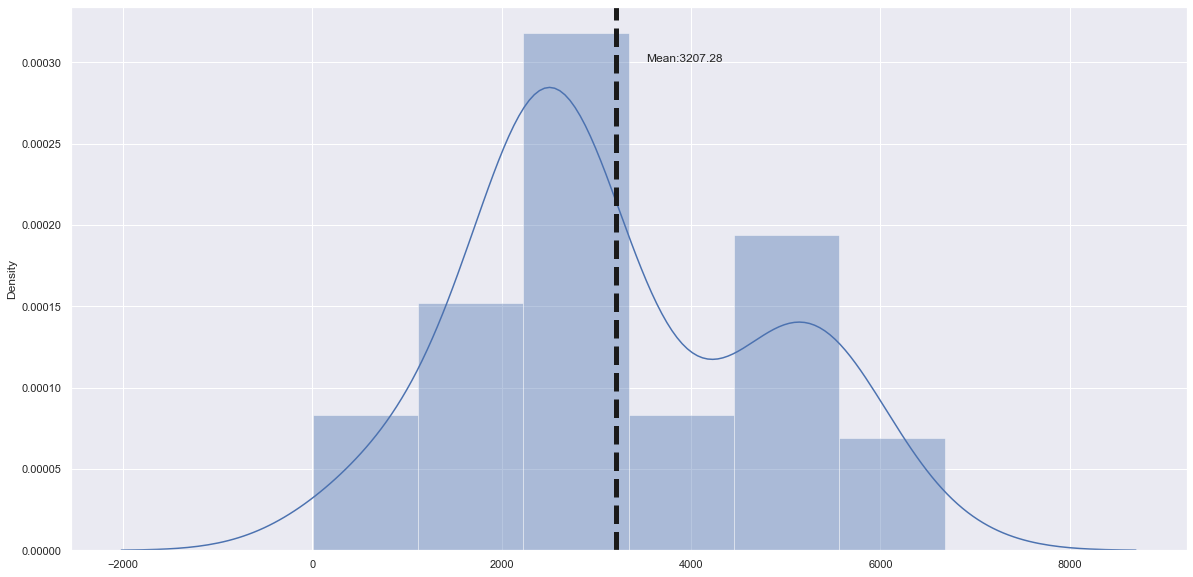

In [15]:
plot_distribution(ger_sales)

In [16]:
fr_sales=np.load("france_sales.npy")

In [18]:
fr_sales

array([   0,  168,  123,  317,  130,  203,  277,  276,  416,   89,  188,
        703,  109,  215, 1537, 2032, 1674, 1558, 2030, 1838, 1810, 2418,
        124, 1463, 1297, 1169, 1511], dtype=int64)

In [19]:
len(fr_sales)

27

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

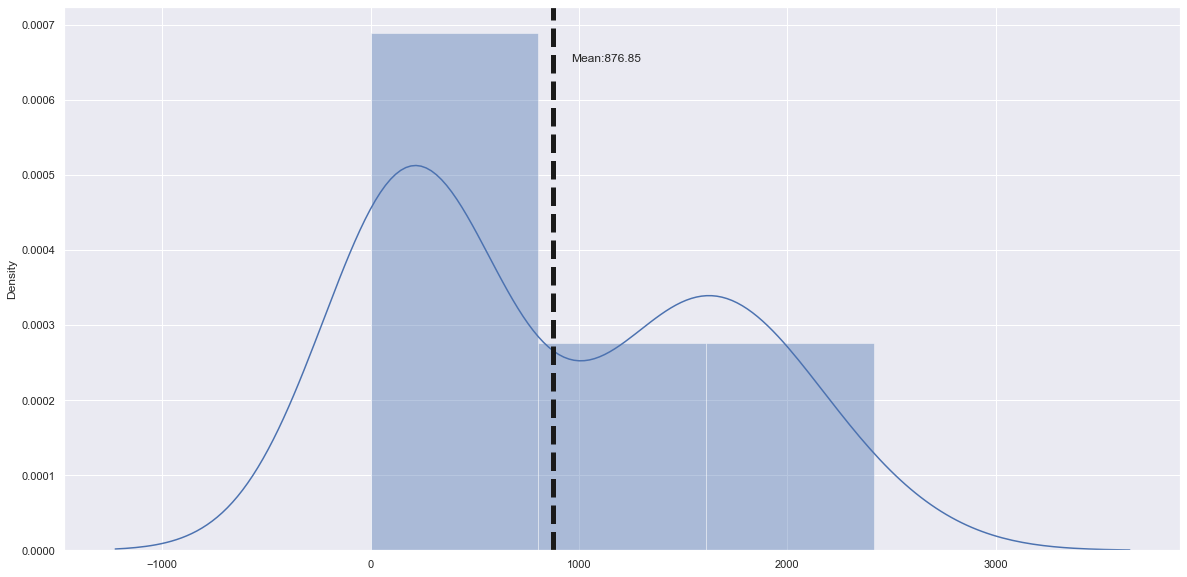

In [20]:
plot_distribution(fr_sales)

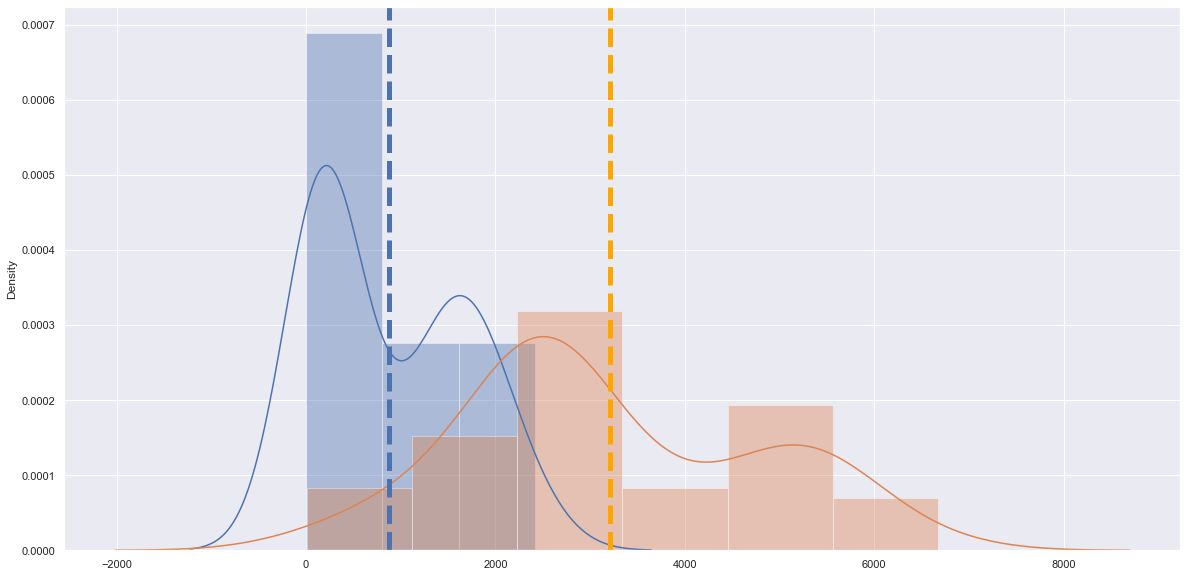

In [21]:
plt.figure()
ax1=sns.distplot(fr_sales)
ax2=sns.distplot(ger_sales)
plt.axvline(np.mean(fr_sales),color='b',linestyle='dashed',linewidth=5)
plt.axvline(np.mean(ger_sales),color='orange',linestyle='dashed',linewidth=5)

In [23]:
def compare_2_groups(arr_1,arr_2,alpha,sample_size):
    stat,p=ttest_ind(arr_1,arr_2)
    print('Statistics=%.3f,p=%3f'%(stat,p))
    if p>alpha:
        print('Same distributions(fail to reject H0)')
    else:
        print('Different distributions(reject H0)')

In [24]:
sample_size=15
ger_sampled=np.random.choice(ger_sales,sample_size)
fr_sampled=np.random.choice(fr_sales,sample_size)
compare_2_groups(ger_sampled,fr_sampled,0.05,sample_size)

Statistics=4.300,p=0.000187
Different distributions(reject H0)
